# Exploratory Data Analysis
## 13
Here you'll bring together some of the individual skills that you demonstrated above and create a Jupyter notebook based blog post on data analysis.

1. Find a dataset that interests you and relates to a question or problem that you find intriguing
2. Using a Jupyter notebook, describe the dataset, the source of the data, and the reason the dataset was of interest.
3. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do two tables need to be merged together? Clean the data so it can be visualized.
3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots.
4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this as if your target audience was the readership of a major news organization - boil down your findings in a way that is accessible, but still accurate.
5. Create a public repository on your github account titled "machine-learning-course". In it, create a readme file that contains the heading "ECE590: Introductory Machine Learning for Data Science". Add, commit, and push that Jupyter notebook to the master branch. Provide the link to the that post here.

### PROBLEM: How to predict the delinquency rate through information on loan applications



- **Problem**: How to predict the delinquency rate through information on loan applications
- **The reason the dataset was of interest**: For the IDS702 course last semester, I constructed a logsitic regression model to interpret how the information on loan applications affect the delinquency rates of loan applicants with this dataset. For this semester, I am particularly interested in applying non-parametric methods on the same dataset and see how the performance differs from the parametric method.
- **The source of the dataset**: The dataset is available on Kaggle and provided by Home Credit Group. (https://www.kaggle.com/c/home-credit-default-risk/data)
- **Description of the dataset**: The dataset contains 122 variables and 38848 observations. "TARGET" is the response variable and the other 121 variables are predictors. The predictor variables describe different information on loan applications, for example, *CNT_CHILDREN* describes how many children does the loan applicant have.

In [1]:
import pandas as pd
train_data = pd.read_csv("application_train.csv")

In [2]:
train_data.shape

(38848, 122)

In [3]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,38848.000000,38848.000000,38848.000000,3.884800e+04,3.884800e+04,38848.000000,3.881900e+04,38848.000000,38848.000000,38848.000000,...,38847.000000,38847.000000,38847.000000,38847.000000,33619.000000,33619.000000,33619.000000,33619.000000,33619.000000,33619.000000
mean,122574.573389,0.080545,0.418709,1.711049e+05,5.990255e+05,27110.769061,5.383075e+05,0.020767,-16032.740476,63977.648991,...,0.008418,0.000669,0.000566,0.000386,0.007377,0.007763,0.033285,0.269015,0.260805,1.886047
std,12986.961189,0.272138,0.725396,6.008824e+05,4.015122e+05,14615.740691,3.689570e+05,0.013764,4357.226298,141429.955979,...,0.091362,0.025862,0.023791,0.019647,0.090308,0.112433,0.197383,0.926456,0.606724,1.864055
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25182.000000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,111301.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19666.000000,-2783.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,122655.500000,0.000000,0.000000,1.440000e+05,5.146898e+05,24939.000000,4.500000e+05,0.018850,-15754.500000,-1218.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,133844.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,34587.000000,6.795000e+05,0.028663,-12390.000000,-285.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,144993.000000,1.000000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,6.000000,6.000000,24.000000,8.000000,25.000000


- **Data cleaning & Missing values**: There are quite a lot of missing values in most columns. We can see the number of missing values of each column as below. For simplicity, I will drop all the missing values and explore the interesting relationship between different variables. After dropping all the missing values, the dataset only has 1059 observations left.

In [4]:
train_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  29
NAME_TYPE_SUITE                 153
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   25616
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    1
FLAG_WORK_PHONE                   1
FLAG_CONT_MOBILE                  1
FLAG_PHONE                        1
FLAG_EMAIL                  

In [5]:
#drop missing values
train_data_dropna = train_data.dropna()
train_data_dropna.shape

(1059, 122)

- **Takeaways from exploring data**: I didn't see any relationship between variables that are very counter-intuitive. Take the plots below as examples. 
1. *TARGET vs AMT_CREDIT*: This plot illustrates the relationship between *TARGET*(0=all other cases, 1= payment difficuties) and *AMT_CREDIT* (loan applicants' credit amount). As credit amounts represent the financial heath of applicants, the more credit amount one has, the less likely the applicant will default their loan.

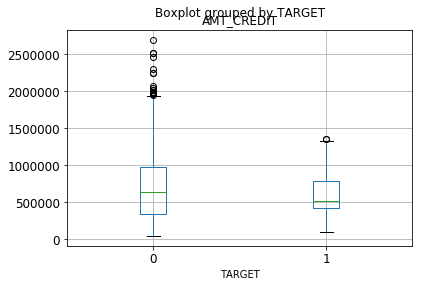

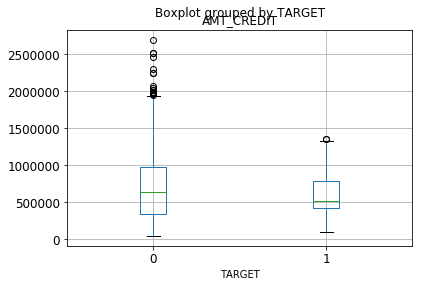

In [8]:
import matplotlib.pyplot as plt
train_data_dropna.boxplot(column = "AMT_CREDIT", by = "TARGET", fontsize = "large")
plt.show()

- *TARGET vs AMT_INCOME_TOTAL*: This plot illustrates the relationship between *TARGET*(0=all other cases, 1= payment difficuties) and *AMT_INCOME_TOTAL* (loan applicants' annual income). It's intutive that applicants with higher incomes are less likely to default their debts.

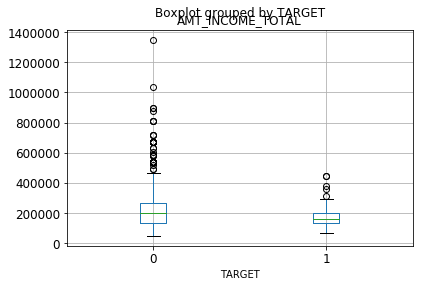

In [9]:
train_data_dropna.boxplot(column = "AMT_INCOME_TOTAL", by = "TARGET", fontsize = "large")
plt.show()

- *TARGET vs AMT_REQ_CREDIT_BUREAU_YEAR*: This plot illustrates the relationship between *TARGET*(0=all other cases, 1= payment difficuties) and *AMT_REQ_CREDIT_BUREAU_YEAR* (Number of enquiries to Credit Bureau about the client one day year). This is a little bit counter-intuitive. Based on banking practices, the higher *AMT_REQ_CREDIT_BUREAU_YEAR* is, the higher chance that the applicant will default their debt because it shows that applicant has track records of applying for many loans. Based on the chart below, I don't see clear difference between *TARGET* = 0 and 1 on *AMT_REQ_CREDIT_BUREAU_YEAR*.

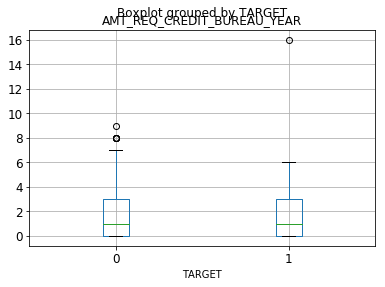

In [10]:
train_data_dropna.boxplot(column = "AMT_REQ_CREDIT_BUREAU_YEAR", by = "TARGET", fontsize = "large")
plt.show()

- *TARGET vs DAYS_EMPLOYED*: This plot illustrates the relationship between *TARGET*(0=all other cases, 1= payment difficuties) and *DAYS_EMPLOYED* (the length of applicants' employment history). The data suggests that the longer the employment history is, the less likely one will default their debt, which makes sense.

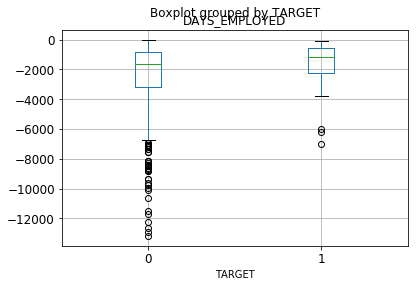

In [12]:
train_data_dropna.boxplot(column = "DAYS_EMPLOYED", by = "TARGET", fontsize = "large")
plt.show()

- Repository Link on Github: https://github.com/WilliamWJHuang/machine-learning-course